# Task 3.2 Language Models
First lets read the data from the given -train and .test files respectively:

In [105]:
START_SYMBOL = '%^% %^%'
END_SYMBOL = '%$% %$%'

# read train and test files
with open('de_text/de_text.train') as f:
    train_sentences = [line.rstrip() for line in f]
with open('de_text/de_text.test') as f:
    test_sentences = [line.rstrip() for line in f]
    
print(f'{len(train_sentences)} \n Example#43:  {train_sentences[43]}')
print(f'{len(test_sentences)} \n Example#43:  {test_sentences[43]}')

50000 
 Example#43:  %^% %^% " Der Werbe-Job begann mich zu langweilen , also schrieb ich wieder . " %$% %$%
50000 
 Example#43:  %^% %^% Er studierte am Southern California Institute of Architecture und bei John Hejduk an der Cooper Union in New York . 1985 gründete er sein eigenes Büro in Tokio . %$% %$%


In [106]:
# for unigram: omit START and END symbols
train_sentences_unigram = [line.lstrip(START_SYMBOL).rstrip(END_SYMBOL) for line in train_sentences]
test_sentences_unigram = [line.lstrip(START_SYMBOL).rstrip(END_SYMBOL) for line in test_sentences]

# tokenize sentences, lowercase each word -> list of lists
tokenized_train_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sentence))) for sentence in train_sentences_unigram]
tokenized_test_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sentence))) for sentence in test_sentences_unigram]

print(f'{len(tokenized_train_text)} \n Example#43:  {tokenized_train_text[43]}')
print(f'{len(tokenized_test_text)} \n Example#43:  {tokenized_test_text[43]}')

50000 
 Example#43:  ['``', 'der', 'werbe-job', 'begann', 'mich', 'zu', 'langweilen', ',', 'also', 'schrieb', 'ich', 'wieder', '.', '``']
50000 
 Example#43:  ['er', 'studierte', 'am', 'southern', 'california', 'institute', 'of', 'architecture', 'und', 'bei', 'john', 'hejduk', 'an', 'der', 'cooper', 'union', 'in', 'new', 'york', '.', '1985', 'gründete', 'er', 'sein', 'eigenes', 'büro', 'in', 'tokio', '.']


## a) List the 20 most frequent words from the training set.

Number of unigrams: 911850


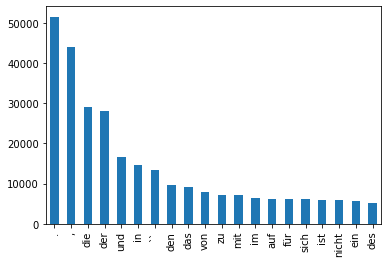

In [107]:
import pandas as pd
from nltk import ngrams, FreqDist

list_unigrams = [ngrams(sentence, 1) for sentence in tokenized_train_text]
# unpack list of lists
text_unigrams = [item for sublist in list_unigrams for item in sublist]
print(f'Number of unigrams: {len(text_unigrams)}')

frequency_dist = FreqDist(text_unigrams)
unigram_dict = dict()
for key, value in frequency_dist.items():
        unigram_dict[' '.join(key)] = value
        
unigram_freq = pd.Series(unigram_dict).nlargest(20).plot(kind='bar')

## b) Compute the percentage of tokens in the test data that have not been seen in the training data.

In [108]:
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

# text_unigrams = text_unigrams_train
list_unigrams_test = [ngrams(sentence, 1) for sentence in tokenized_test_text]
# unpack list of lists
text_unigrams_test = [item for sublist in list_unigrams_test for item in sublist]
print(f'Number of unigrams in test-data: {len(text_unigrams_test)}')

unigrams_in_test_but_not_in_train = diff(text_unigrams_test, text_unigrams)
print(f'Number token in test, but not in training: {len(unigrams_in_test_but_not_in_train)}')
print(f'\nPercentage not seen in train: {len(unigrams_in_test_but_not_in_train) / len(text_unigrams_test)}')

Number of unigrams in test-data: 907335
Number token in test, but not in training: 67300

Percentage not seen in train: 0.07417326566262736


## c) List the 20 most frequent bigrams from the training set.

Number of bigrams: 961850


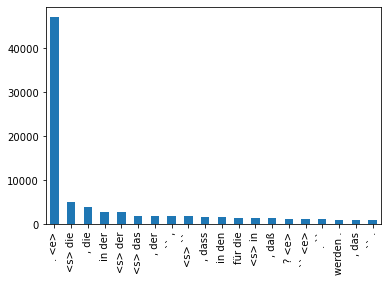

In [109]:
list_bigrams = [ngrams(sentence, 2, 
                       pad_left=True, 
                       pad_right=True, 
                       left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                       right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                for sentence in tokenized_train_text]
# unpack list of lists
text_bigrams = [item for sublist in list_bigrams for item in sublist]
print(f'Number of bigrams: {len(text_bigrams)}')

frequency_dist = FreqDist(text_bigrams)
bigram_dict = dict()
for key, value in frequency_dist.items():
        bigram_dict[' '.join(key)] = value
        
bigram_freq = pd.Series(bigram_dict).nlargest(20).plot(kind='bar')

## d) Compute the percentage of bigrams in the test data that have not been seen in the training data.

In [110]:
list_bigrams_test = [ngrams(sentence, 2, 
                            pad_left=True, 
                            pad_right=True, 
                            left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                            right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                    for sentence in tokenized_test_text]
# unpack list of lists
text_bigrams_test = [item for sublist in list_bigrams_test for item in sublist]
print(f'Number of bigrams in test-data: {len(text_bigrams_test)}')

bigrams_in_test_but_not_in_train = diff(text_bigrams_test, text_bigrams)
print(f'Number token in test, but not in training: {len(bigrams_in_test_but_not_in_train)}')
print(f'\nPercentage not seen in train: {len(bigrams_in_test_but_not_in_train) / len(text_bigrams_test)}')

Number of bigrams in test-data: 957335
Number token in test, but not in training: 391930

Percentage not seen in train: 0.40939691957360796


## e) Compute the percentage of trigrams in the test data that have not been seen in the training data.

In [111]:
list_trigrams = [ngrams(sentence, 3,
                        pad_left=True, 
                        pad_right=True, 
                        left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                        right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                for sentence in tokenized_train_text]

list_trigrams_test = [ngrams(sentence, 3, 
                            pad_left=True, 
                            pad_right=True, 
                            left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                            right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                    for sentence in tokenized_test_text]
# unpack list of lists
text_trigrams = [item for sublist in list_trigrams for item in sublist]
text_trigrams_test = [item for sublist in list_trigrams_test for item in sublist]
print(f'Number of trigrams in train-data: {len(text_trigrams)}')
print(f'Number of trigrams in test-data: {len(text_trigrams_test)}')

trigrams_in_test_but_not_in_train = diff(text_trigrams_test, text_trigrams)
print(f'Number token in test, but not in training: {len(trigrams_in_test_but_not_in_train)}')
print(f'\nPercentage not seen in train: {len(trigrams_in_test_but_not_in_train) / len(text_trigrams_test)}')

Number of trigrams in train-data: 1011850
Number of trigrams in test-data: 1007335
Number token in test, but not in training: 715001

Percentage not seen in train: 0.7097946561967965


## f) How many sentences in the test data are estimated to have zero probability by an MLE bigram model from the training data?

Answer:
* each sentence of the test data that has at least one bigram, which does not occur in the training data (creating prob. of zero)

In [112]:
from nltk import bigrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.lm import Vocabulary

n = 2
train_data = [bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="<e>") for t in tokenized_train_text]
words = [word for sent in tokenized_train_text for word in sent]
words.extend(["<s>", "<e>"])
padded_vocab = Vocabulary(words)
model = MLE(n)
model.fit(train_data, padded_vocab)

### TEST ###

test_data = [bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="</s>") for t in tokenized_test_text]
for test in test_data[1:2]:
    print ("MLE Estimates:", [((ngram[-1], ngram[:-1]),model.score(ngram[-1], ngram[:-1])) for ngram in test])

zero_prob_sentences = []
for bigram_sent in test_data:
    for bigram in bigram_sent:
        if model.score(bigram[-1], bigram[:-1]) == 0.0:
            zero_prob_sentences.append((bigram_sent, bigram))
            break # only count once
            
print(f'\nNumber of sentences in test with zero prob: {len(zero_prob_sentences)}')

MLE Estimates: [(('ebbe', ('<s>',)), 0.0), (('in', ('ebbe',)), 0.0), (('der', ('in',)), 0.19108627504429604), (('staatskasse', ('der',)), 3.556061306496924e-05), (('/', ('staatskasse',)), 0.0), (('/', ('/',)), 0.1574074074074074), (('im', ('/',)), 0.0), (('ersten', ('im',)), 0.01425914445133292), (('halbjahr', ('ersten',)), 0.05723905723905724), (('diesen', ('halbjahr',)), 0.0), (('jahres', ('diesen',)), 0.012232415902140673), (('sank', ('jahres',)), 0.0), (('das', ('sank',)), 0.0), (('steueraufkommen', ('das',)), 0.00022119000221190003), (('(', ('steueraufkommen',)), 0.0), (('ohne', ('(',)), 0.0017205781142463868), (('gemeindesteuern', ('ohne',)), 0.0), ((')', ('gemeindesteuern',)), 0), (('gegenüber', (')',)), 0.0003443526170798898), (('dem', ('gegenüber',)), 0.21634615384615385), (('gleichen', ('dem',)), 0.0013608087091757388), (('zeitraum', ('gleichen',)), 0.07547169811320754), (('des', ('zeitraum',)), 0.09090909090909091), (('vorjahresum', ('des',)), 0.0), (('5,2', ('vorjahresum',)

## g) Give the probabilities of the first 3 sentences from the test data, using a linear combination of 0-gram, unigram, bigram and trigram model with $\lambda_0 = 1.0 x 10^{-10}$; $\lambda_1 = 0.01$; $\lambda_2 = 0.2$; $\lambda_3 = 1-(\lambda_0 + \lambda_1 + \lambda_2$)

In [113]:
import numpy as np
from nltk import bigrams, trigrams

lambda_0 = 10**(-10)
lambda_1 = 0.01
lambda_2 = 0.2
lambda_3 = 1.0 - (lambda_0 + lambda_1 + lambda_2)

### TRAIN ###

#train_data_unigram = [ngrams(sentence, 1) for sentence in tokenized_train_text]

train_data_unigram, padded_vocab = padded_everygram_pipeline(1, tokenized_train_text) # n = 1

train_data_bigram = [bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="<e>") for t in tokenized_train_text]
train_data_trigram = [ngrams(sentence, 3,
                        pad_left=True, 
                        pad_right=True, 
                        left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                        right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                for sentence in tokenized_train_text]
words = [word for sent in tokenized_train_text for word in sent]
padded_vocab = Vocabulary(words.extend(["<s>", "<e>"]))
unigram_model = MLE(1).fit(train_data_unigram, padded_vocab) # n = 1
bigram_model = MLE(2).fit(train_data_bigram, padded_vocab)
trigram_model = MLE(3).fit(train_data_trigram, padded_vocab)

### TEST ###

#test_data_unigram = [ngrams(sentence, 1) for sentence in tokenized_test_text]
test_data_unigram, _ = padded_everygram_pipeline(1, tokenized_test_text) # n = 1
test_data_bigram = [ngrams(sentence, 2, 
                       pad_left=True, 
                       pad_right=True, 
                       left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                       right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                for sentence in tokenized_test_text]
test_data_trigram = [ngrams(sentence, 3,
                        pad_left=True, 
                        pad_right=True, 
                        left_pad_symbol='<s>', # as we removed start symbol, replace by <s> for plotting reasons
                        right_pad_symbol='<e>') # as we removed end symbol, replace by <e> for plotting reasons
                for sentence in tokenized_test_text]

#for test in test_data[:3]:
#    for n
#print("Unigram:", np.prod([unigram_model.score(unigram) for unigram in test_data_unigram[0]]))
print("Bigram:", np.prod([bigram_model.score(bigram[-1], bigram[:-1]) for bigram in test_data_bigram[0]]))

AttributeError: 'NoneType' object has no attribute 'score'